# MA124 Maths by Computer: Assignment 3 
## Part A: Monte Carlo Integration

Student number: u2100098

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

---
We consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. Since $\sin(x)/x$ does not have an elementary antiderivative we must use numerical methods to evaluate this integral.

First, we use Monte Carlo to estimate the mean value of the function f over the interval [a,b] to estimate the integral.

The Monte Carlo estimate for the integral is 0.3606262631649825



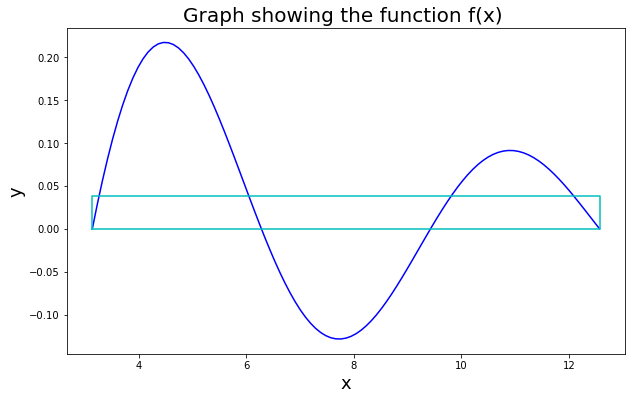

In [190]:
# define the function f(x) to integrate
def my_fun(x):
    return -1*np.sin(x)/x

# set the interval [a,b] and the number of samples
a, b = np.pi, 4*np.pi
N = 10**6

# generate the samples and evaluate f at each 
x = np.random.uniform(a, b, N)
f_of_x = my_fun(x)

# compute the mean and estimate the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean
print("The Monte Carlo estimate for the integral is", my_integral)
print()

# set the figure size and label
plt.figure(figsize=(10,6))
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.title("Graph showing the function f(x) ", fontsize=20)
# generate the co-ordinates of f(x) and plot them
x_plot = np.linspace(a, b, 101)
y_plot = my_fun(x_plot)
# plot the rectangle representing the cartesian product [a,b]x[0,f bar]
plt.plot(x_plot ,y_plot, 'b')
plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0], 'c')
plt.show()

The graph shows the function $y = f(x)$ and the rectangular plot representing the Cartesian product $[a,b] \times [0,\bar f]$.

---
Next, we use Monte Carlo to estimate the integral by estimating the signed area below the curve.

Note that $$
\int_a^b f(x) \, dx = \text{signed area under the curve}
$$ 

The graph $y = f(x)$ partitions the rectangle into three regions - those that contribute positively to the integral, those that contribute negatively to the integral, and those that do not contribute. We use 2000 sample points and determine what region they lie in to determine how they contribute.

We can estimate the area of the region above the line $y = 0$ and below $y = f(x)$ (positive contribution), and estimate the area of the region below the line $y = 0$ and the above $y = f(x)$ (negative contribution). We estimate the integral by subtracting the second estimate from the first.

The points in the positively contributing region are red, the points in the negatively contirbuting region are green, and the points  that are in the region that do not contrbute are blue. We then display a small square of the average colour of all the points.

In [184]:
def indicator_function(x,y):
    # function returns 1 if the area contributes positively or -1 if the area contributes negatively to the integral
    # note this is no longer a true indicator function since it doesn't return values of 1 and 0, but returns 1 and -1 instead
    if (((x>np.pi) and (x<2*np.pi)) or ((x>3*np.pi) and (x<4*np.pi))):
        return 1*(((y<my_fun(x)) and (y>0)))
    else:
        return -1*(((y>my_fun(x)) and (y<0)))

def colour_plot(x,y):
    # plots the samples in the correct colour; red for the positive contributions, green for the negative contributions, blue for the non-contributing points
    R,G,B=0,0,0
    for i in range(N):
        if (((x[i]>np.pi) and (x[i]<2*np.pi)) and (((y[i]<=my_fun(x[i])) and (y[i]>0)))) or ((x[i]>3*np.pi) and (x[i]<4*np.pi)) and (((y[i]<=my_fun(x[i])) and (y[i]>0))):
            plt.plot(x[i] ,y[i], 'o',color=(1,0,0), markersize=3.5)
            R+=1
        elif ((x[i]>2*np.pi) and (x[i]<3*np.pi)) and (((y[i]>my_fun(x[i])) and (y[i]<0))):
            plt.plot(x[i], y[i], 'o',color=(0,1,0), markersize=3.5)
            G+=1
        else:
            plt.plot(x[i] ,y[i], 'o',color=(0,0,1), markersize=3.5)
            B+=1
    # returns the number of red, green, and blue points
    return R,G,B
    
def average_colour_square():
    # displays the square with the average colour of all the points
    plt.plot(0.5, 0.5, 's', markersize=300, color = (colour_count[0]/N,colour_count[1]/N,colour_count[2]/N))
    plt.axis('off')
    plt.show()

The area of the region is 0.3679197696435347


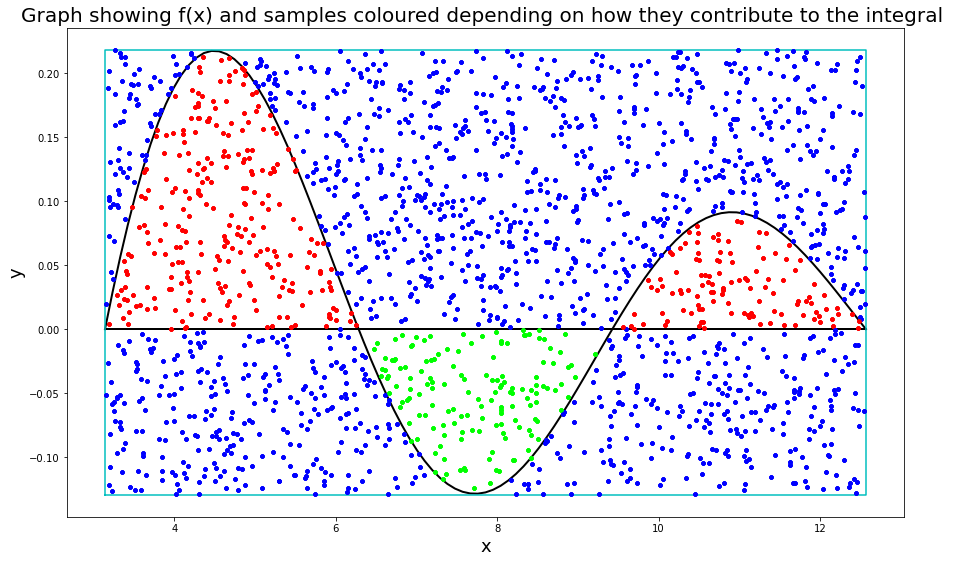

The number of red, green, and blue points are:  [375, 150, 1475]
The average RGB value of the points is:  [0.1875, 0.075, 0.7375]  and is shown below.


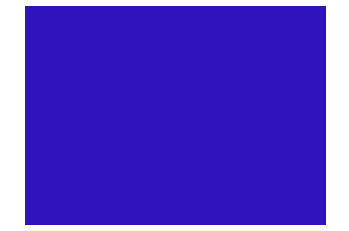

In [191]:
N = 2000
y_min, y_max = -0.129, 0.218

x = np.random.uniform(a, b, N)
y = np.random.uniform(y_min, y_max, N)

# add up the total number of points within the region
total = 0
for i in range(N):
    total += indicator_function(x[i], y[i])

# obtains the area to estimate the integral
rectangle_area = (b-a)*(y_max-y_min)
region_area = rectangle_area * total/N

print("The area of the region is", region_area)

# plotting the graphs
# set the figure size and label
plt.figure(figsize=(15,9))
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.title("Graph showing f(x) and samples coloured depending on how they contribute to the integral ", fontsize=20)
# plot the original function
x_plot = np.linspace(a, b, 101)
y_plot = my_fun(x_plot)

# plot the line y=0
y_line = np.zeros(101)
plt.plot(x_plot,y_line,'black',linewidth=2)
plt.plot(x_plot,y_plot, 'black',linewidth=2)
# plot the rectangular sample space
plt.plot([a,b,b,a,a],[y_min,y_min,y_max, y_max,y_min], 'c')

# call the colour_plot function, and create a list counting how many red green and blue samples there are
colour_count=[colour_plot(x,y)[0],colour_plot(x,y)[1],colour_plot(x,y)[2]]
plt.show()
# define a new list as the average RGB value of all the points
colour_proportions=[colour_count[0]/N,colour_count[1]/N,colour_count[2]/N]

print('The number of red, green, and blue points are: ',colour_count)
print('The average RGB value of the points is: ',colour_proportions, ' and is shown below.')

average_colour_square()

The graph above shows the graph of $y = f(x)$ and the 2000 random smaples, coloured according to the contribution to the integral.